# Machine Learning - Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("../data/customer_data_complete.csv")

In [4]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [5]:
silhouettes = {}

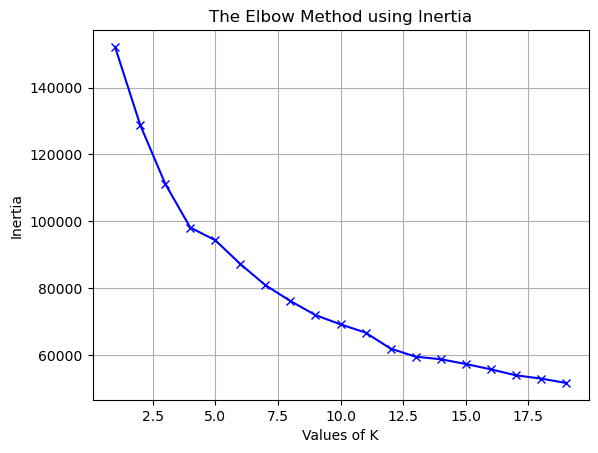

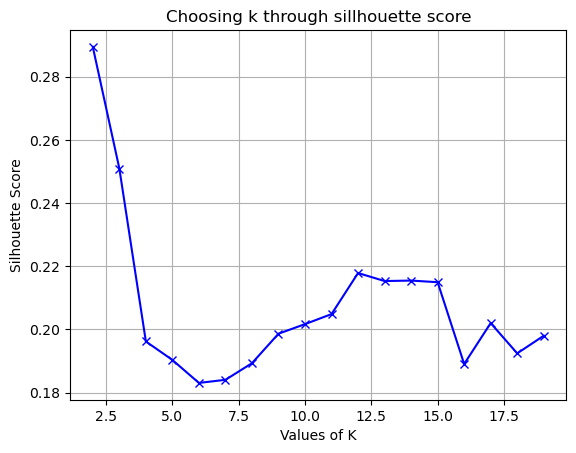

In [6]:
inertia = []
sil = []

kvalues = range(1, 20)

for k in kvalues:
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=101)
  kmeans.fit_predict(scaled_df)
  inertia.append(kmeans.inertia_)
  if (k==1): 
    continue
  sil.append(silhouette_score(scaled_df, kmeans.labels_, metric = 'euclidean'))
  
plt.plot(kvalues,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

plt.plot(kvalues[1:],sil,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Choosing k through sillhouette score')
plt.grid()
plt.show()

Let's investigate 2 and 12 clusters. To visualise this let's use PCA

In [7]:
pca = PCA(n_components=2) # keep 2 variables that create the most variance
pc = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pc ,columns=["PC1","PC2"])

<AxesSubplot: >

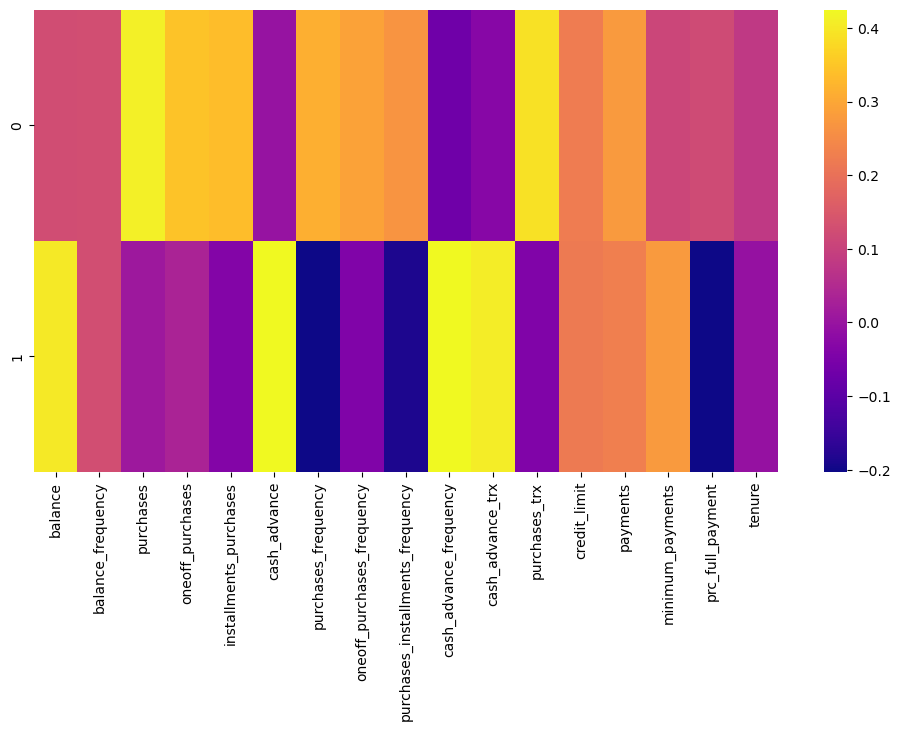

In [8]:
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [9]:
kmeans_2_model = KMeans(2, n_init='auto', random_state=101)
kmeans_2_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster_2':kmeans_2_model.labels_})],axis=1)
silhouettes["Kmeans (2)"] = silhouette_score(scaled_df, kmeans_2_model.labels_, metric = 'euclidean')

kmeans_12_model = KMeans(12, n_init='auto', random_state=101)
kmeans_12_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df_kmeans, pd.DataFrame({'cluster_12':kmeans_12_model.labels_})],axis=1)
silhouettes["Kmeans (12)"] = silhouette_score(scaled_df, kmeans_12_model.labels_, metric = 'euclidean')

In [10]:
pca_df_kmeans.head()

,PC1,PC2,cluster_2,cluster_12
0,-1.757751,-1.024376,1,1
1,-0.991011,2.572188,1,0
2,0.948049,-0.430944,0,7
3,-0.894372,0.027677,1,1
4,-1.648433,-0.627081,1,1


Text(0.5, 1.0, 'Clustering with K-Means algorithm (2 clusters)')

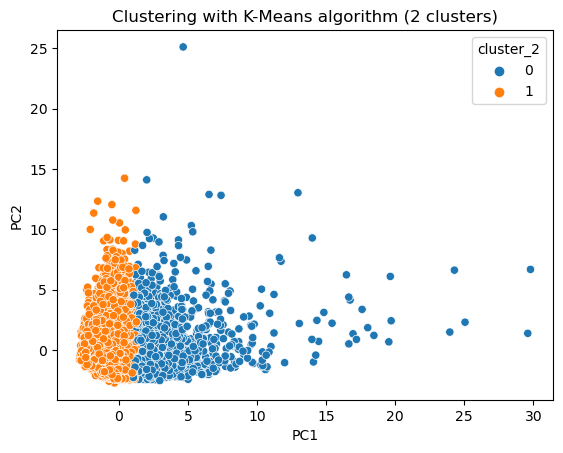

In [11]:
sns.scatterplot(pca_df_kmeans, x='PC1', y='PC2', hue='cluster_2')
plt.title("Clustering with K-Means algorithm (2 clusters)")

Text(0.5, 1.0, 'Clustering with K-Means algorithm (12 clusters)')

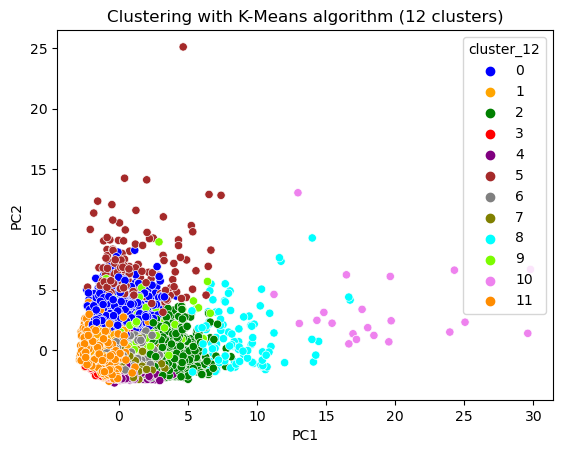

In [12]:
sns.scatterplot(pca_df_kmeans, x='PC1', y='PC2', hue='cluster_12', palette=['blue', 'orange', 'green', 'red', 
                                                                            'purple', 'brown', 'gray', 'olive', 
                                                                            'cyan', 'lawngreen', 'violet', 'darkorange'])
plt.title("Clustering with K-Means algorithm (12 clusters)")

So I mean it depends on what we are trying to predict on how many clusters we want to use. I make these judgements with limited context. 

**Objective:** This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups."

I suspect that it is more useful to use the 12 cluster identification for separating people for the above criteria as I do not think 2 categories will provide enough spread in the available information. Let's try to investigate some of these labels further now.

In [13]:
cluster_df = pd.concat([df, pd.DataFrame({'Cluster':kmeans_12_model.labels_})], axis=1)
cluster_df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,456.708235,0.000000,12.0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1


<AxesSubplot: xlabel='Cluster', ylabel='count'>

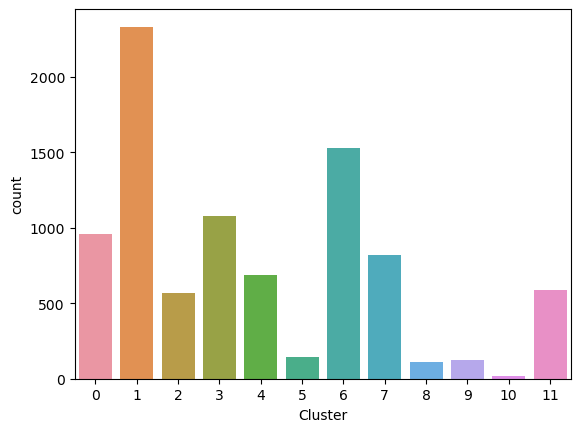

In [14]:
sns.countplot(cluster_df, x='Cluster')

Imbalanced clustering, in particular we note how few entries are in cluster 10. <br>
Looking back at our PCA, cluster 10 is definitely separate from the other entires and deserves to be a cluster.

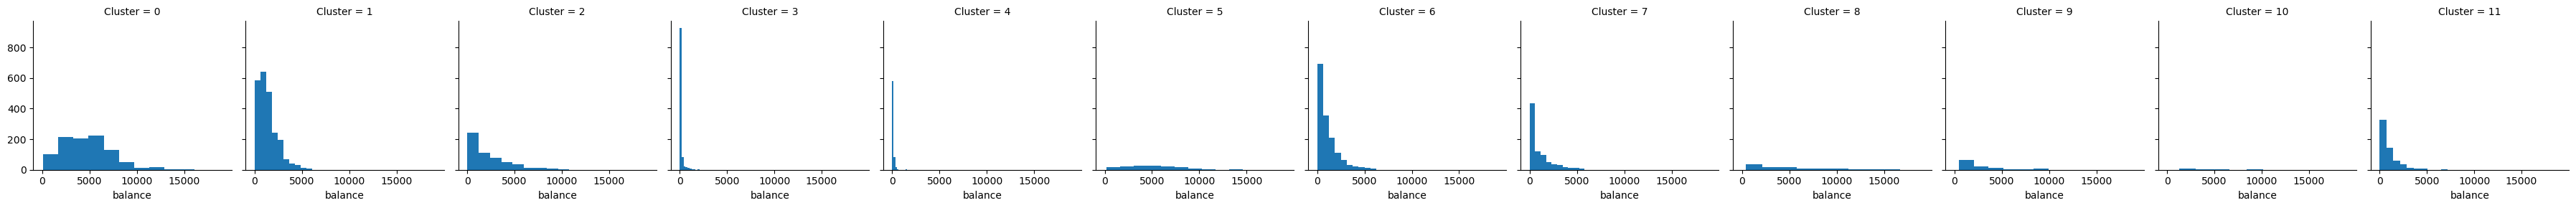

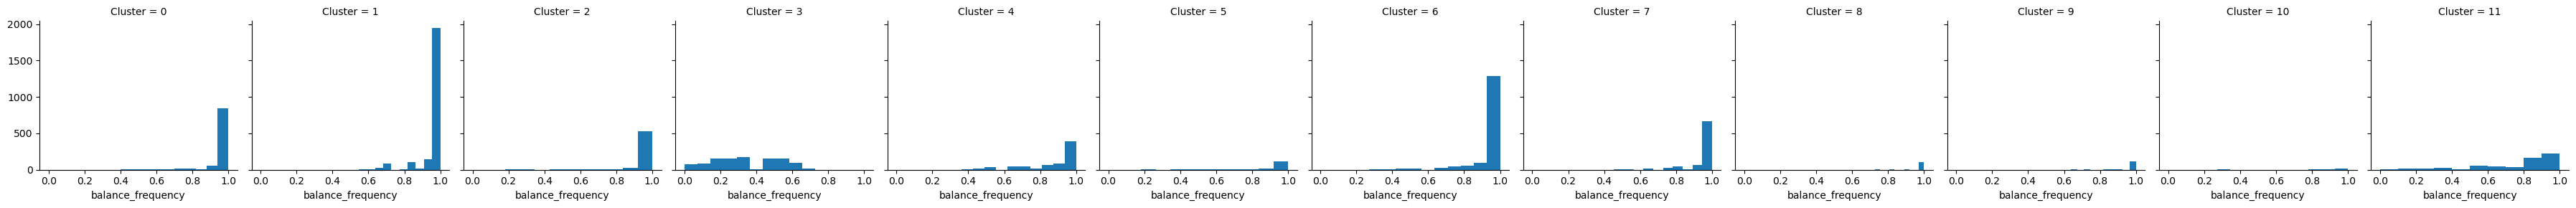

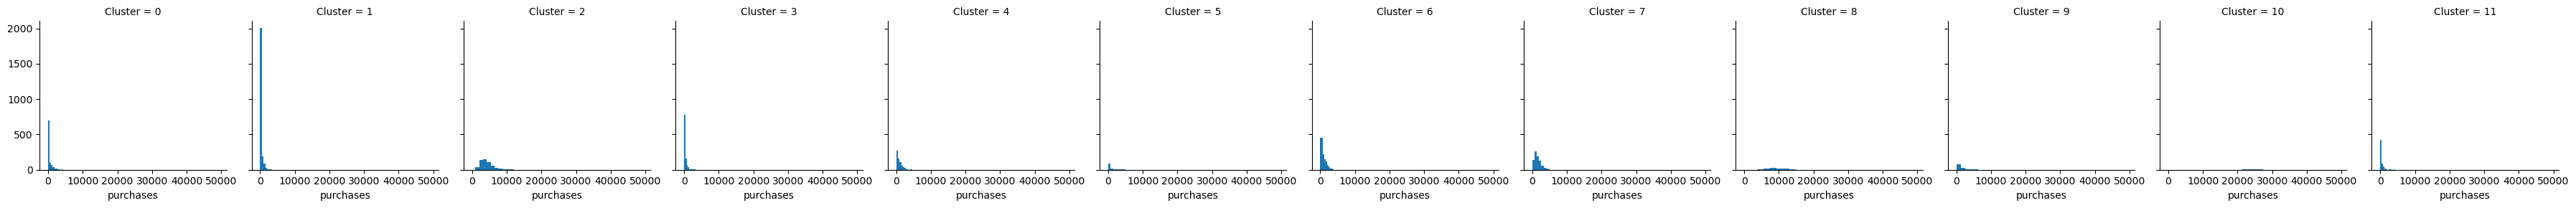

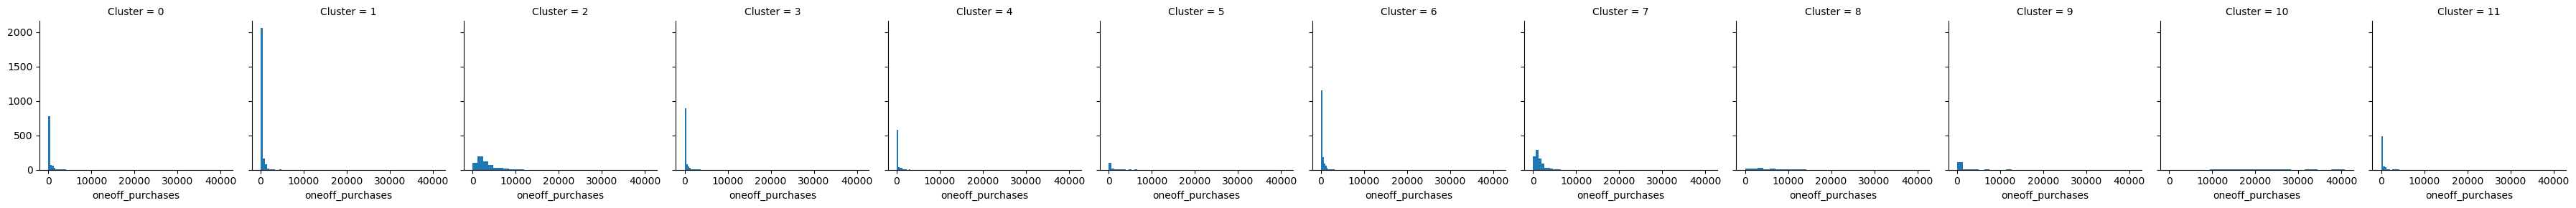

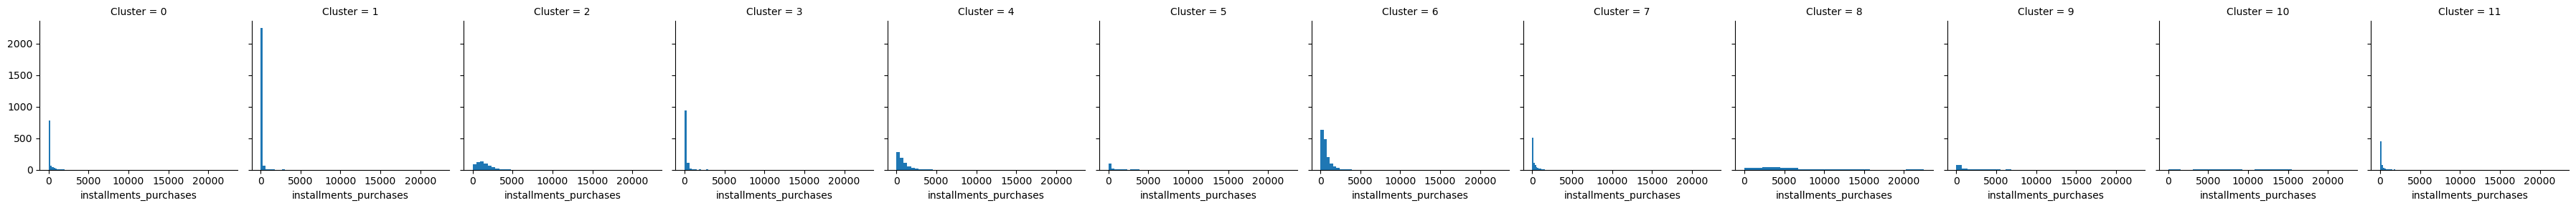

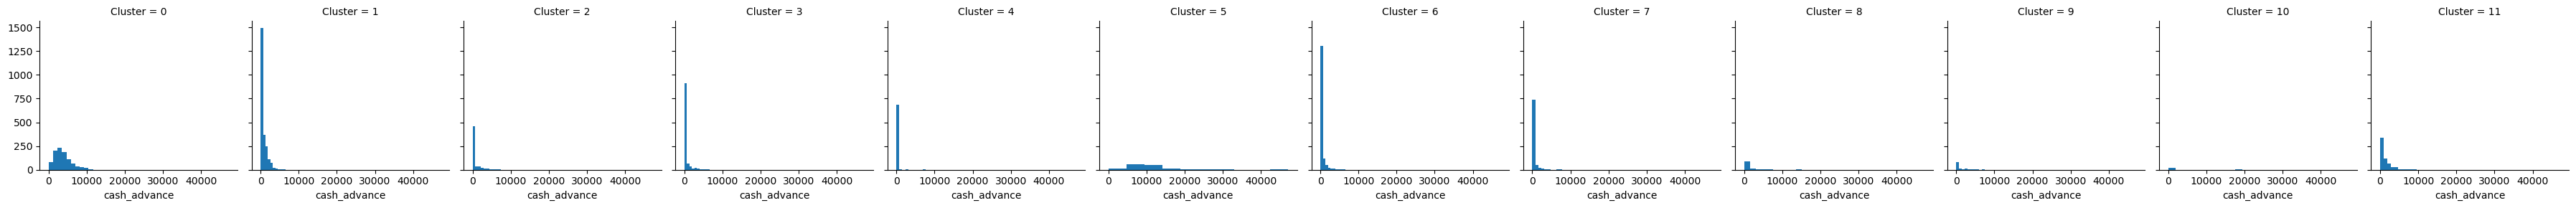

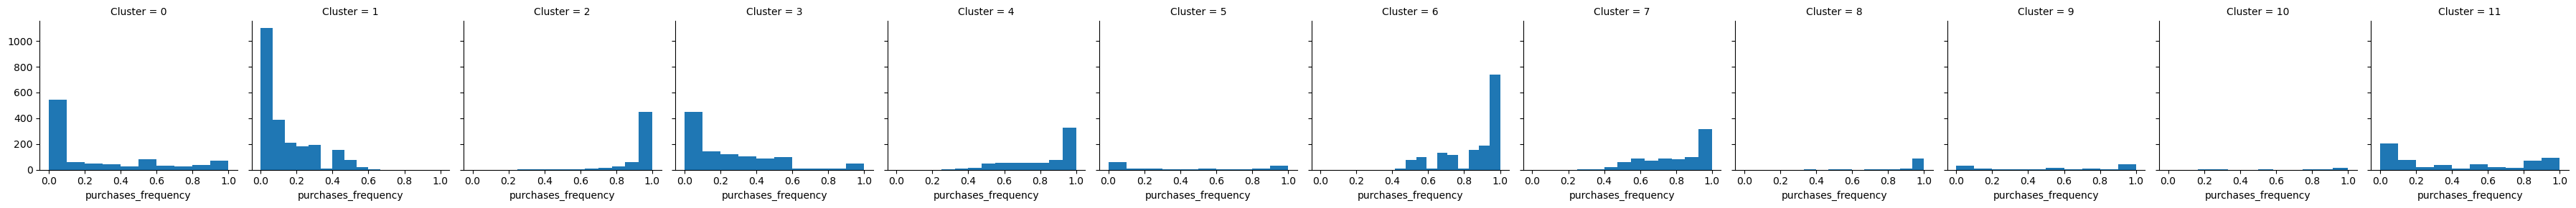

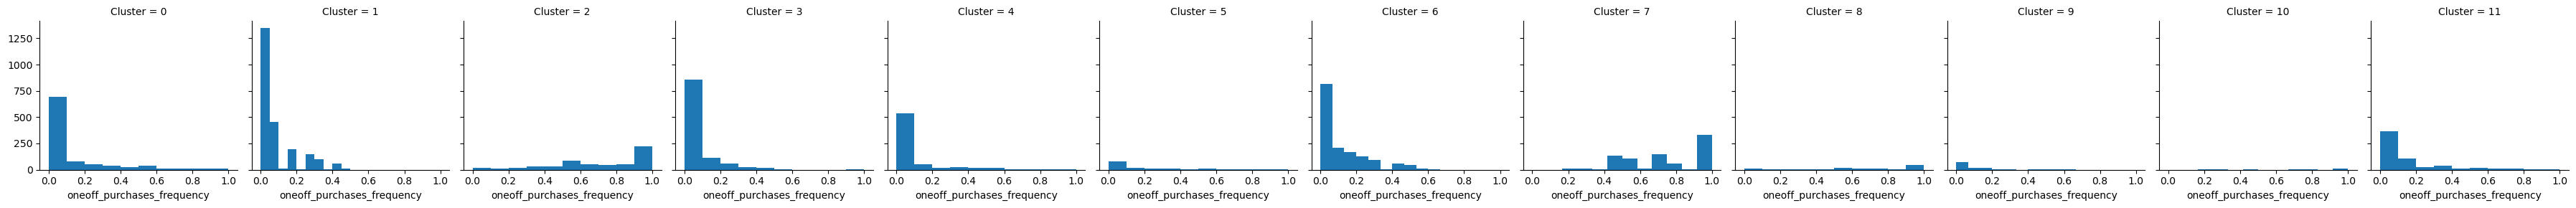

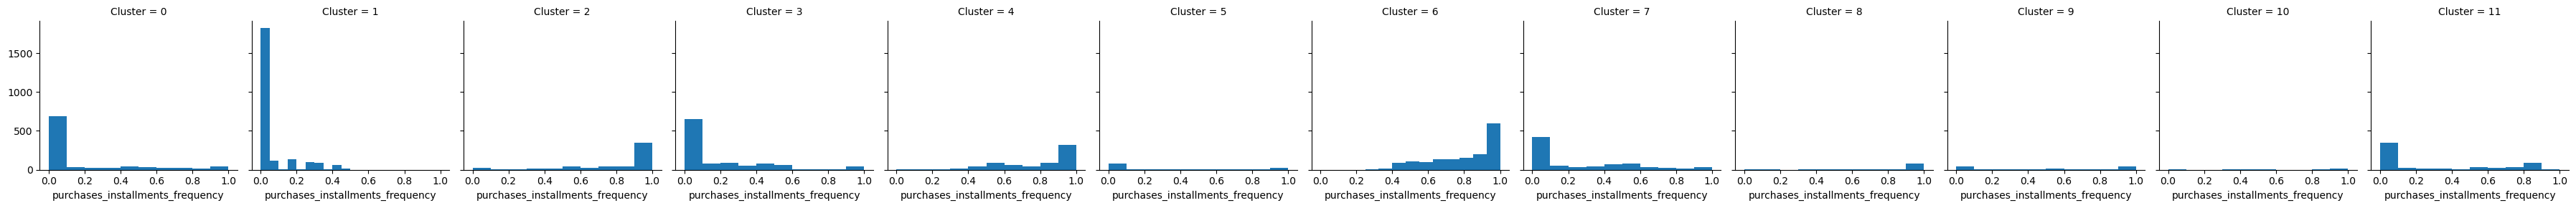

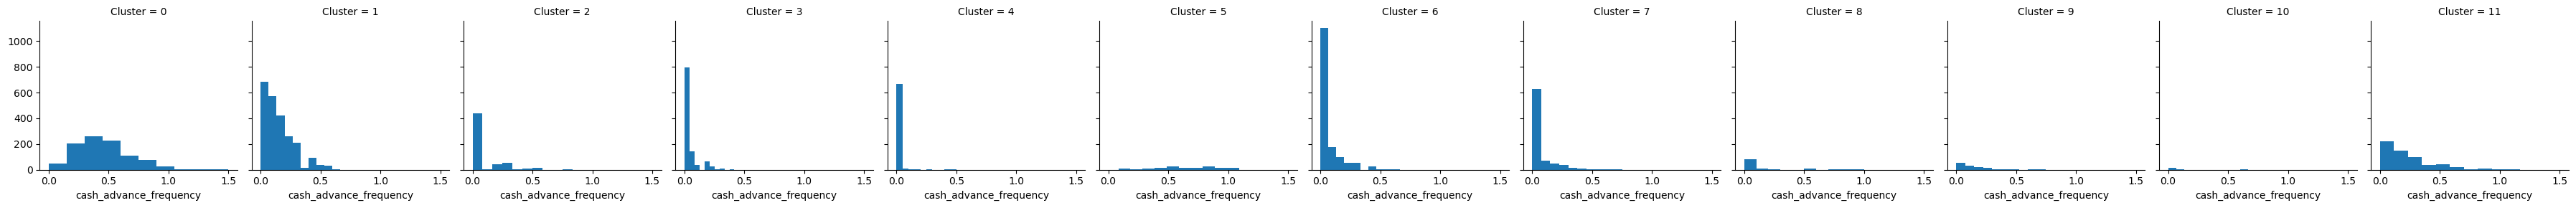

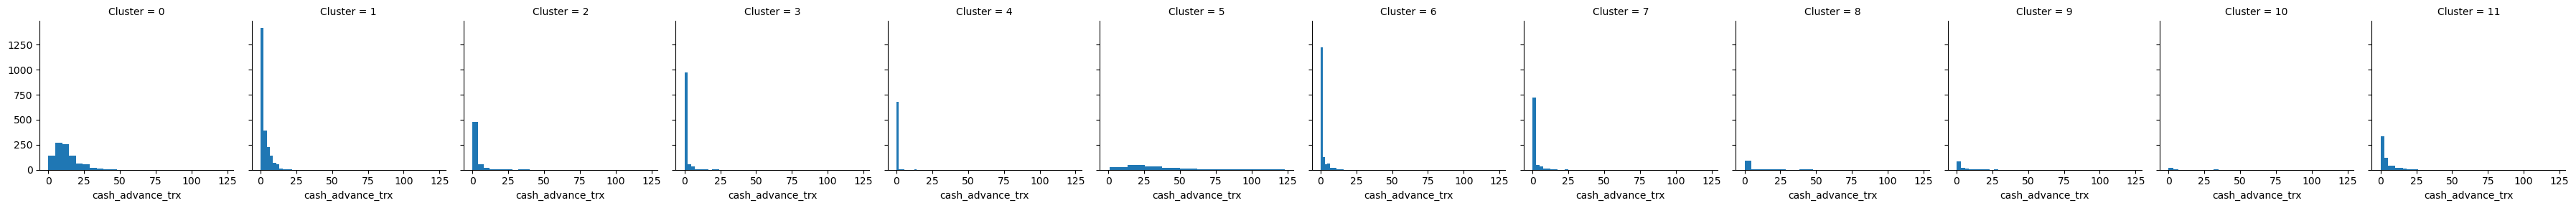

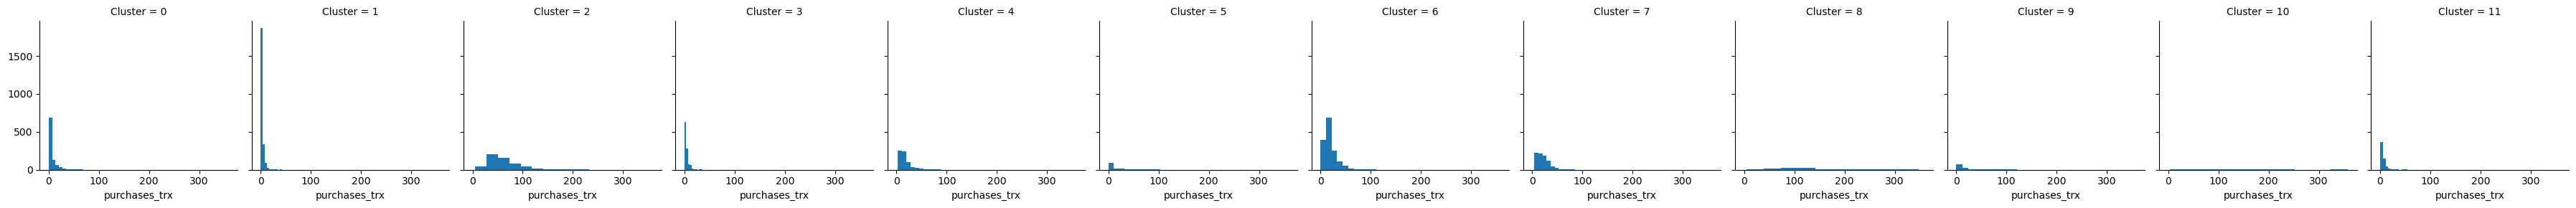

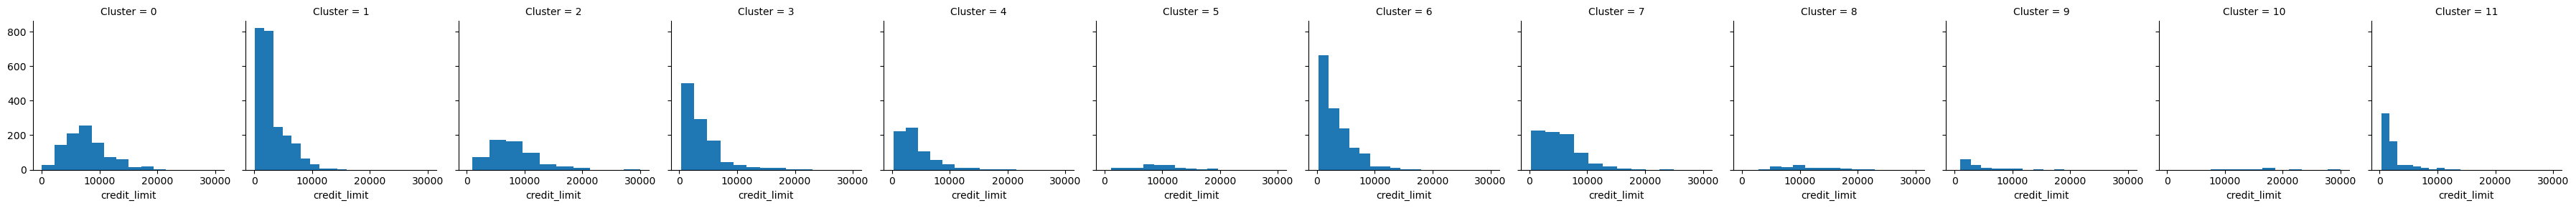

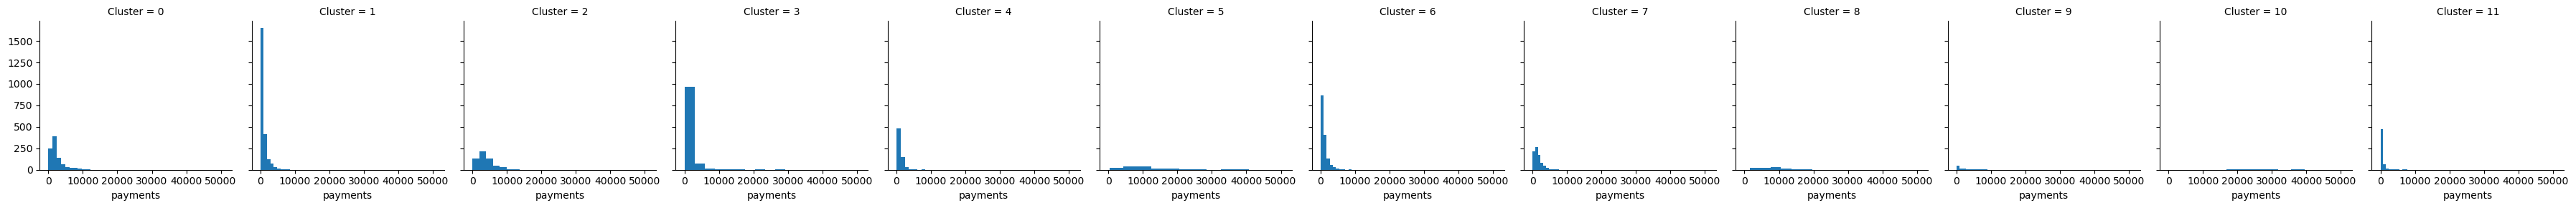

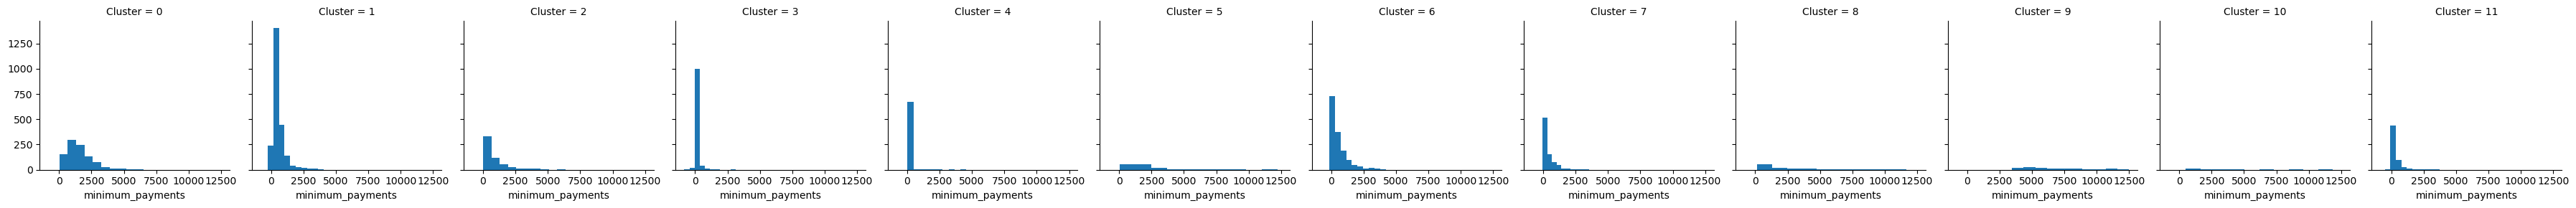

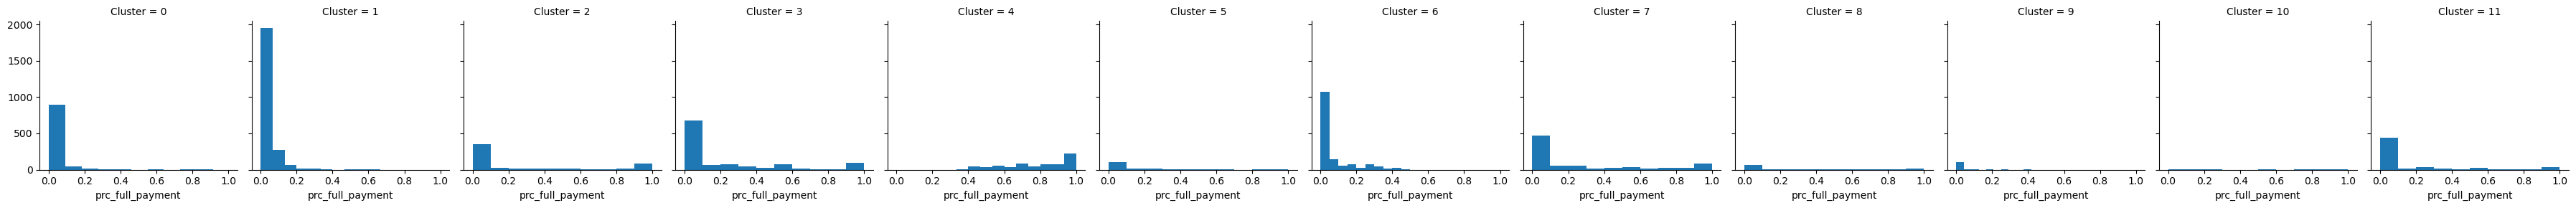

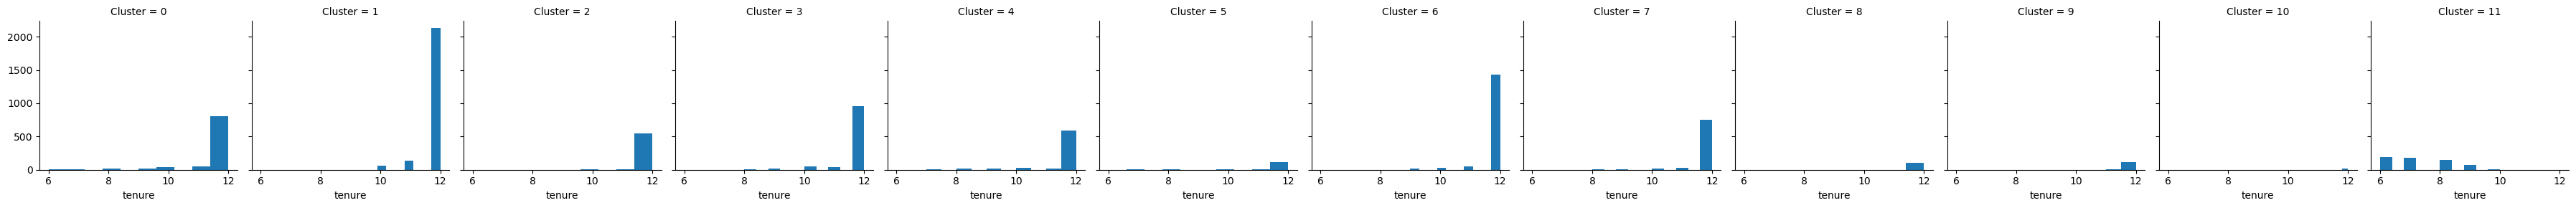

In [15]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)

<AxesSubplot: xlabel='Cluster', ylabel='balance'>

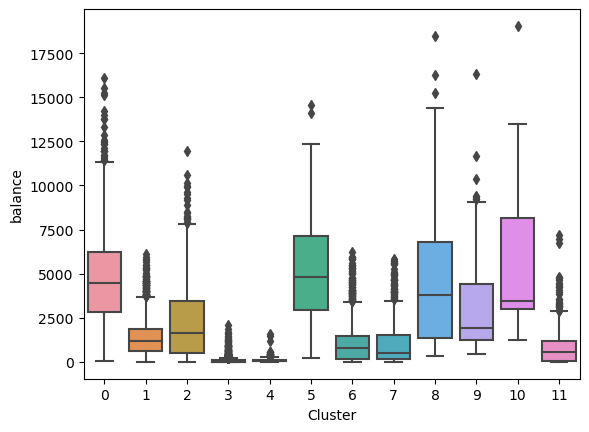

In [16]:
sns.boxplot(cluster_df, x='Cluster', y='balance')

I think this is an easier way to visualise the differences between the clusters than the FacetGrid so if requested can be made for each column but I shall refrain from doing so right now as I do not believe it is going to add anything to my understanding of this project.

# Additional algorithms

In [17]:
from sklearn.cluster import AffinityPropagation

affProp = AffinityPropagation(random_state=101)
affProp.fit_predict(scaled_df)
silhouettes["AffinityPropagation"] = silhouette_score(scaled_df, affProp.labels_, metric = 'euclidean')
print(silhouettes["AffinityPropagation"])

0.12370050336064392


In [18]:
print("number of clusters = ", affProp.n_features_in_)

number of clusters =  17


Might be worth visualising the results of this but 17 clusters to deal with...

In [19]:
from sklearn.cluster import MeanShift

meanShift = MeanShift()
meanShift.fit_predict(scaled_df)
silhouettes["Mean Shift"] = silhouette_score(scaled_df, meanShift.labels_, metric = 'euclidean')
print(silhouettes["Mean Shift"])
print("number of clusters = ", meanShift.n_features_in_)

0.2763329268814518
number of clusters =  17


Found spectral clustering through Scikit-Learns model selection diagram although through later investigation find that this is of the order of N^3 in terms of complexity so was taking too much time to train.

In [20]:
#from sklearn.cluster import SpectralClustering

#spec = SpectralClustering(random_state=101)
#spec.fit_predict(scaled_df)
#silhouettes["Spectral Clustering"] = silhouette_score(scaled_df, spec.labels_, metric = 'euclidean')
#print(silhouettes["Spectral Clustering"])


# Results

In [21]:
silhouettes = {k: v for k, v in sorted(silhouettes.items(), key=lambda item: item[1], reverse=True)}

print("{:<40} {:<10}".format('Method','silhouette score'))
for method, sil in silhouettes.items():
  print("{:<40} {:<10.4f}".format(method, sil))

Method                                   silhouette score
Kmeans (2)                               0.2894    
Mean Shift                               0.2763    
Kmeans (12)                              0.2179    
AffinityPropagation                      0.1237    


So as I said previously, I'm not sure 2 clusters is enough segmentation of the market so let's move forward with the MeanShift model. <br>

Is a silhouette score of 0.28 good enough?

Research shows that ideally a score above 0.7 is considered "strong", 0.5 < score < 0.7 is "reasonable" and 0.25 < score < 0.5 is "weak".

Therefore we do have only a "weak" clustering which makes sense as our data in 2 dimensions is not very spatially separated.

# More visualisation techniques

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

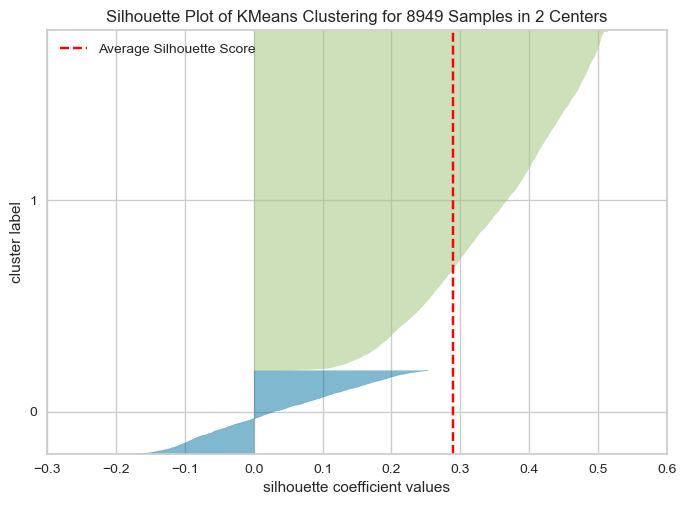

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 8949 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
visualizer = SilhouetteVisualizer(kmeans_2_model, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

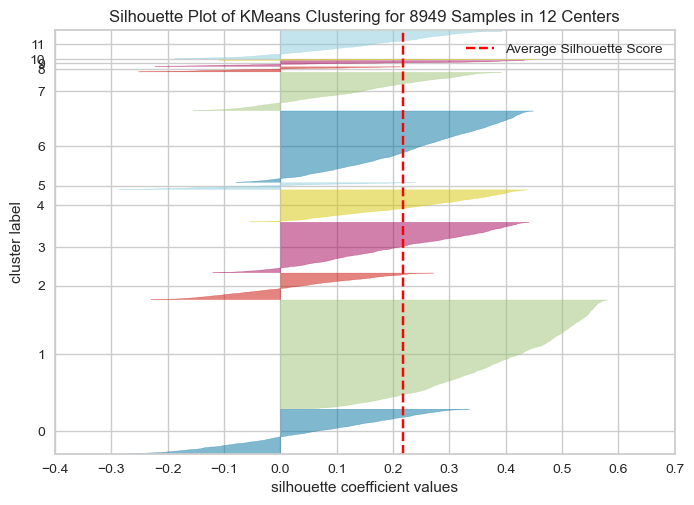

<Figure size 800x550 with 0 Axes>

In [24]:
visualizer = SilhouetteVisualizer(kmeans_12_model, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()
plt.tight_layout()
